<a href="https://colab.research.google.com/github/vfunnny2000/NN/blob/main/HW_2_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [34]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import PIL
import PIL.Image
from keras.api._v2.keras.preprocessing import image
# import tensorflow.keras
# from tensorflow.keras.preprocessing import image

In [35]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [36]:
input_shape = (28, 28, 1)

In [37]:
model_1 = keras.Sequential([
    keras.Input(shape=input_shape),
    Flatten(),
    Dense(50),
    Dense(10) ] )

In [38]:
model_1.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
x_train = x_train / 255
x_test = x_test / 255

In [40]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [41]:
model_2 = keras.Sequential([
    keras.Input(shape=input_shape),
    Flatten(),
    Dense(50, activation="relu"),
    Dense(10, activation="softmax")
    ] )

In [42]:
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [43]:
history = model_2.fit(x_train, y_train, batch_size=32, epochs=5, validation_data =(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3260 - accuracy: 0.9089 - val_loss: 0.1894 - val_accuracy: 0.9449
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1647 - accuracy: 0.9524 - val_loss: 0.1361 - val_accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1240 - accuracy: 0.9633 - val_loss: 0.1154 - val_accuracy: 0.9649
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0984 - accuracy: 0.9705 - val_loss: 0.1002 - val_accuracy: 0.9693
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0828 - accuracy: 0.9754 - val_loss: 0.0997 - val_accuracy: 0.9694


In [44]:
scores = model_2.evaluate(x_test, y_test)
print("Доля верных ответов в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9694
Доля верных ответов в процентах: 96.94


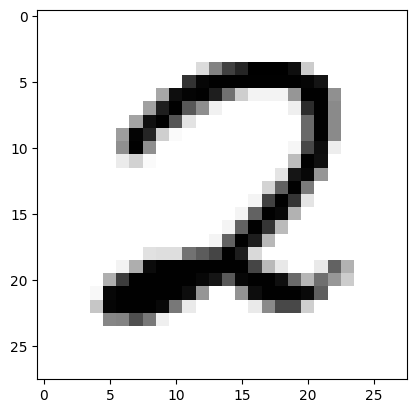

1/1 [==============================] - 0s 65ms/step
Цифра: 2


In [45]:
n_rec=35
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("Цифра:", prediction)

In [52]:
img = image.load_img('//content/sample_data/t3.jpg')
img = img.resize((28,28))
img = img.convert('L')
img = np.array(img)
img = img.reshape(1,28,28)
img = img/255.0
prediction = model_2.predict(img)
prediction = np.argmax(prediction)



1/1 [==============================] - 0s 25ms/step


In [53]:
print("цифра:", prediction)

цифра: 3
